# <center>Метрики классификации</center>

Будем рассматривать метрики для задачи регрессии на следующем примере. Мы выбрали случайным образом десять пациентов из нашей таблицы и предсказали для них моделью log_reg_full ответы:

$$ y = (1, 0, 1, 1, 0, 1, 1, 0, 1, 1) $$
$$ \widehat{y} = (1, 1, 0, 1, 0, 0, 1, 1, 0, 1) $$

Все метрики, которые мы рассмотрим, основаны на **матрице ошибок**

>**Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Назовём класс 1 **положительным исходом (positive)**, а класс 0 — **отрицательным исходом (negative)**.

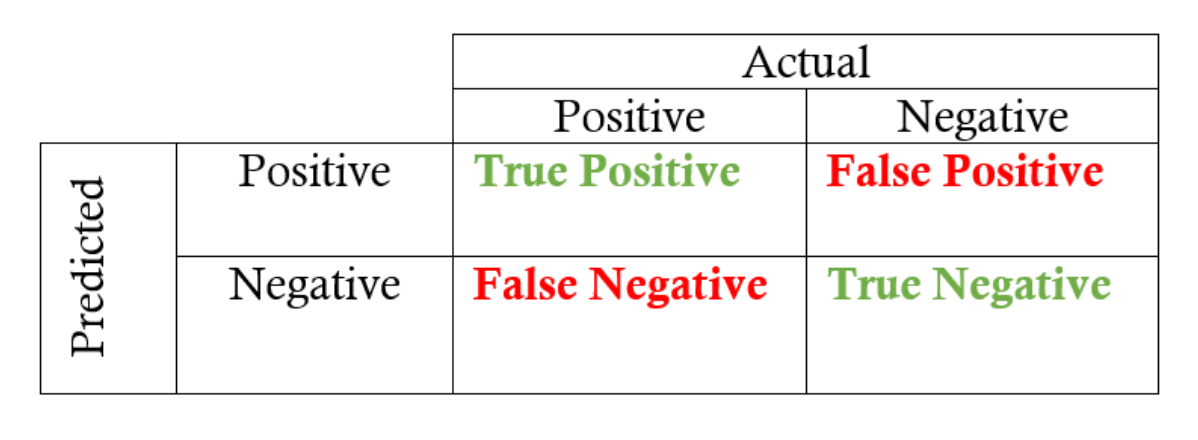

Матрице соответствуют **четыре возможных исхода классификации**:
* *True Positive (TP)* — количество ответов, обозначенных моделью как класс 1 ($\widehat{y}=1$) и действительно являющихся классом 1 ($y=1$).
* *False Positive (FP)* — количество ответов, обозначенных моделью как класс 1 ($\widehat{y}=1$), но в действительности являющихся классом 0 ($y=0$).
* *False Negative (FN)* — количество ответов, обозначенных моделью как класс 0 ($\widehat{y}=0$), но в действительности являющихся классом 1 ($y=1$).
* *True Negative (TN)* — количество ответов, обозначенных моделью как класс 0 ($\widehat{y}=0$) и действительно являющихся классом 0 ($y=0$).

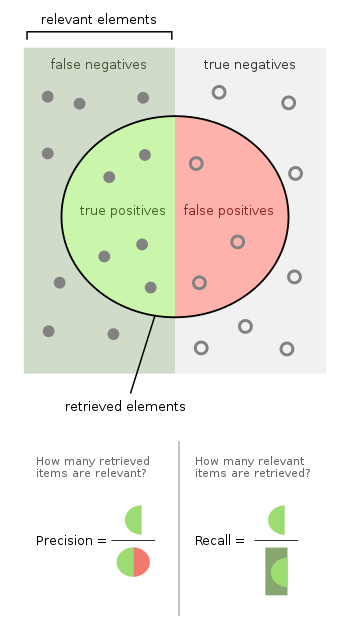

|     |$y=1$|$y=0$|
|:--- |:---:|---: |
|$y=1$| TP=4|FP=2 |
|$y=0$| FN=3|TN=1 |

Нередко в русской литературе вы можете встретить перевод метрики **accuracy** как «точность», однако так же на русский язык переводится метрика **precision**

>**Accuracy (достоверность)** — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (*True Positive*) и истинно отрицательные ответы (*True Negative*):
$$ accuracy = \frac{TP+TN}{TP+TN+FN+FP} $$
>**Интерпретация**: как много (в долях) модель угадала ответов.

<font color=lightpink>*Accuracy* — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы.</font>

>**Precision (точность)**, или **PPV (Positive Predictive Value)** — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.
$$ precision = \frac{TP}{TP+FP} $$

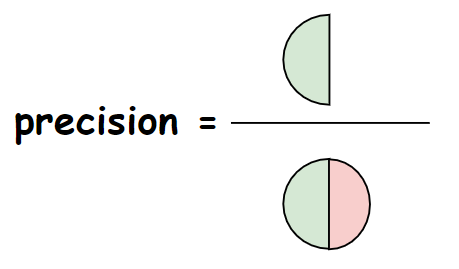
>**Интерпретация**: способность отделить класс 1 от класса 0. Чем больше *precision*, тем меньше ложных попаданий. 

*Precision* нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть *precision*.

>**Recall (полнота)**, или **TPR (True Positive Rate)** — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.
$$ recall = \frac{TP}{TP+FN} $$

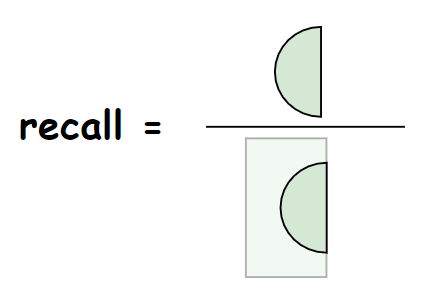
>**Интерпретация**: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на *recall*.

*Recall* очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Метрики *precision* и *recall* не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что **увеличение одной из метрик может привести к уменьшению другой**.

<font color=lightpink>Концентрация только на одной метрике (precision или recall) без учёта второй — сомнительная идея.

В битве за максимум precision для класса 1 побеждает модель, которая всегда будет говорить говорить «нет». У неё вообще не будет ложных срабатываний.

В битве за максимум recall для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1. 

В реальности необходимо балансировать между двумя этими метриками.</font>

>$F_{\beta}$(**F-мера**) - это **взвешенное среднее гармоническое** между *precision* и *recall*:
>$$ F_{\beta} = (1+\beta^2)\frac{precision \cdot recall}{(\beta^2precision)+recall} $$
>где $\beta$ - вес *precision* в метрике: чем больше $\beta$, тем больше вклад

В частном случае, когда $\beta = 1$, мы получаем равный вклад для *precision* и *recall*, а формула будет выражать простое среднее гармоническое, или метрику $F_1$ ($F_1$-мера):
$$ F_1 = 2 \frac{precision \cdot recall}{precision + recall} $$

>В чём преимущество $F_1$-меры?
>
>Метрика равна своему максимуму (1), если и *precision*, и *recall* равны 1. Но если хотя бы одна из метрик будет близка к 0, то и $F_1$ будет близка к 0. 

* **Accuracy** - `sklearn.metrics.accuracy_score()`
* **Precision** - `sklearn.metrics.precision_score()`
* **Recall** - `sklearn.metrics.recall_score()`
* **$F_1$-мера** - `sklearn.metrics.f1_score()`

In [3]:
FP = 9
FN = 6
TP = 6
TN = 14
accuracy = round((TP+TN) / (TP+TN+FP+FN), 2)
print('Accuracy:', accuracy)

Accuracy: 0.57
